In [2]:
# from pandas import read_csv
import pandas as pd
filename = '../Week 1/pima-indians-diabetes.data.csv'
names = ['timesPreg', 'plasmaConcenTest', 'bloodPres', 'skinFoldThickness',
         '2HSerumInsulin', 'BMI', 'diabetesPedigree', 'age', 'onsetOfDiabetesbtw5yrs']
# data = read_csv(filename, names=names)
df = pd.read_csv(filename, names=names)
df.head(2)

,timesPreg,plasmaConcenTest,bloodPres,skinFoldThickness,2HSerumInsulin,BMI,diabetesPedigree,age,onsetOfDiabetesbtw5yrs
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
df.describe()

,timesPreg,plasmaConcenTest,bloodPres,skinFoldThickness,2HSerumInsulin,BMI,diabetesPedigree,age,onsetOfDiabetesbtw5yrs
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


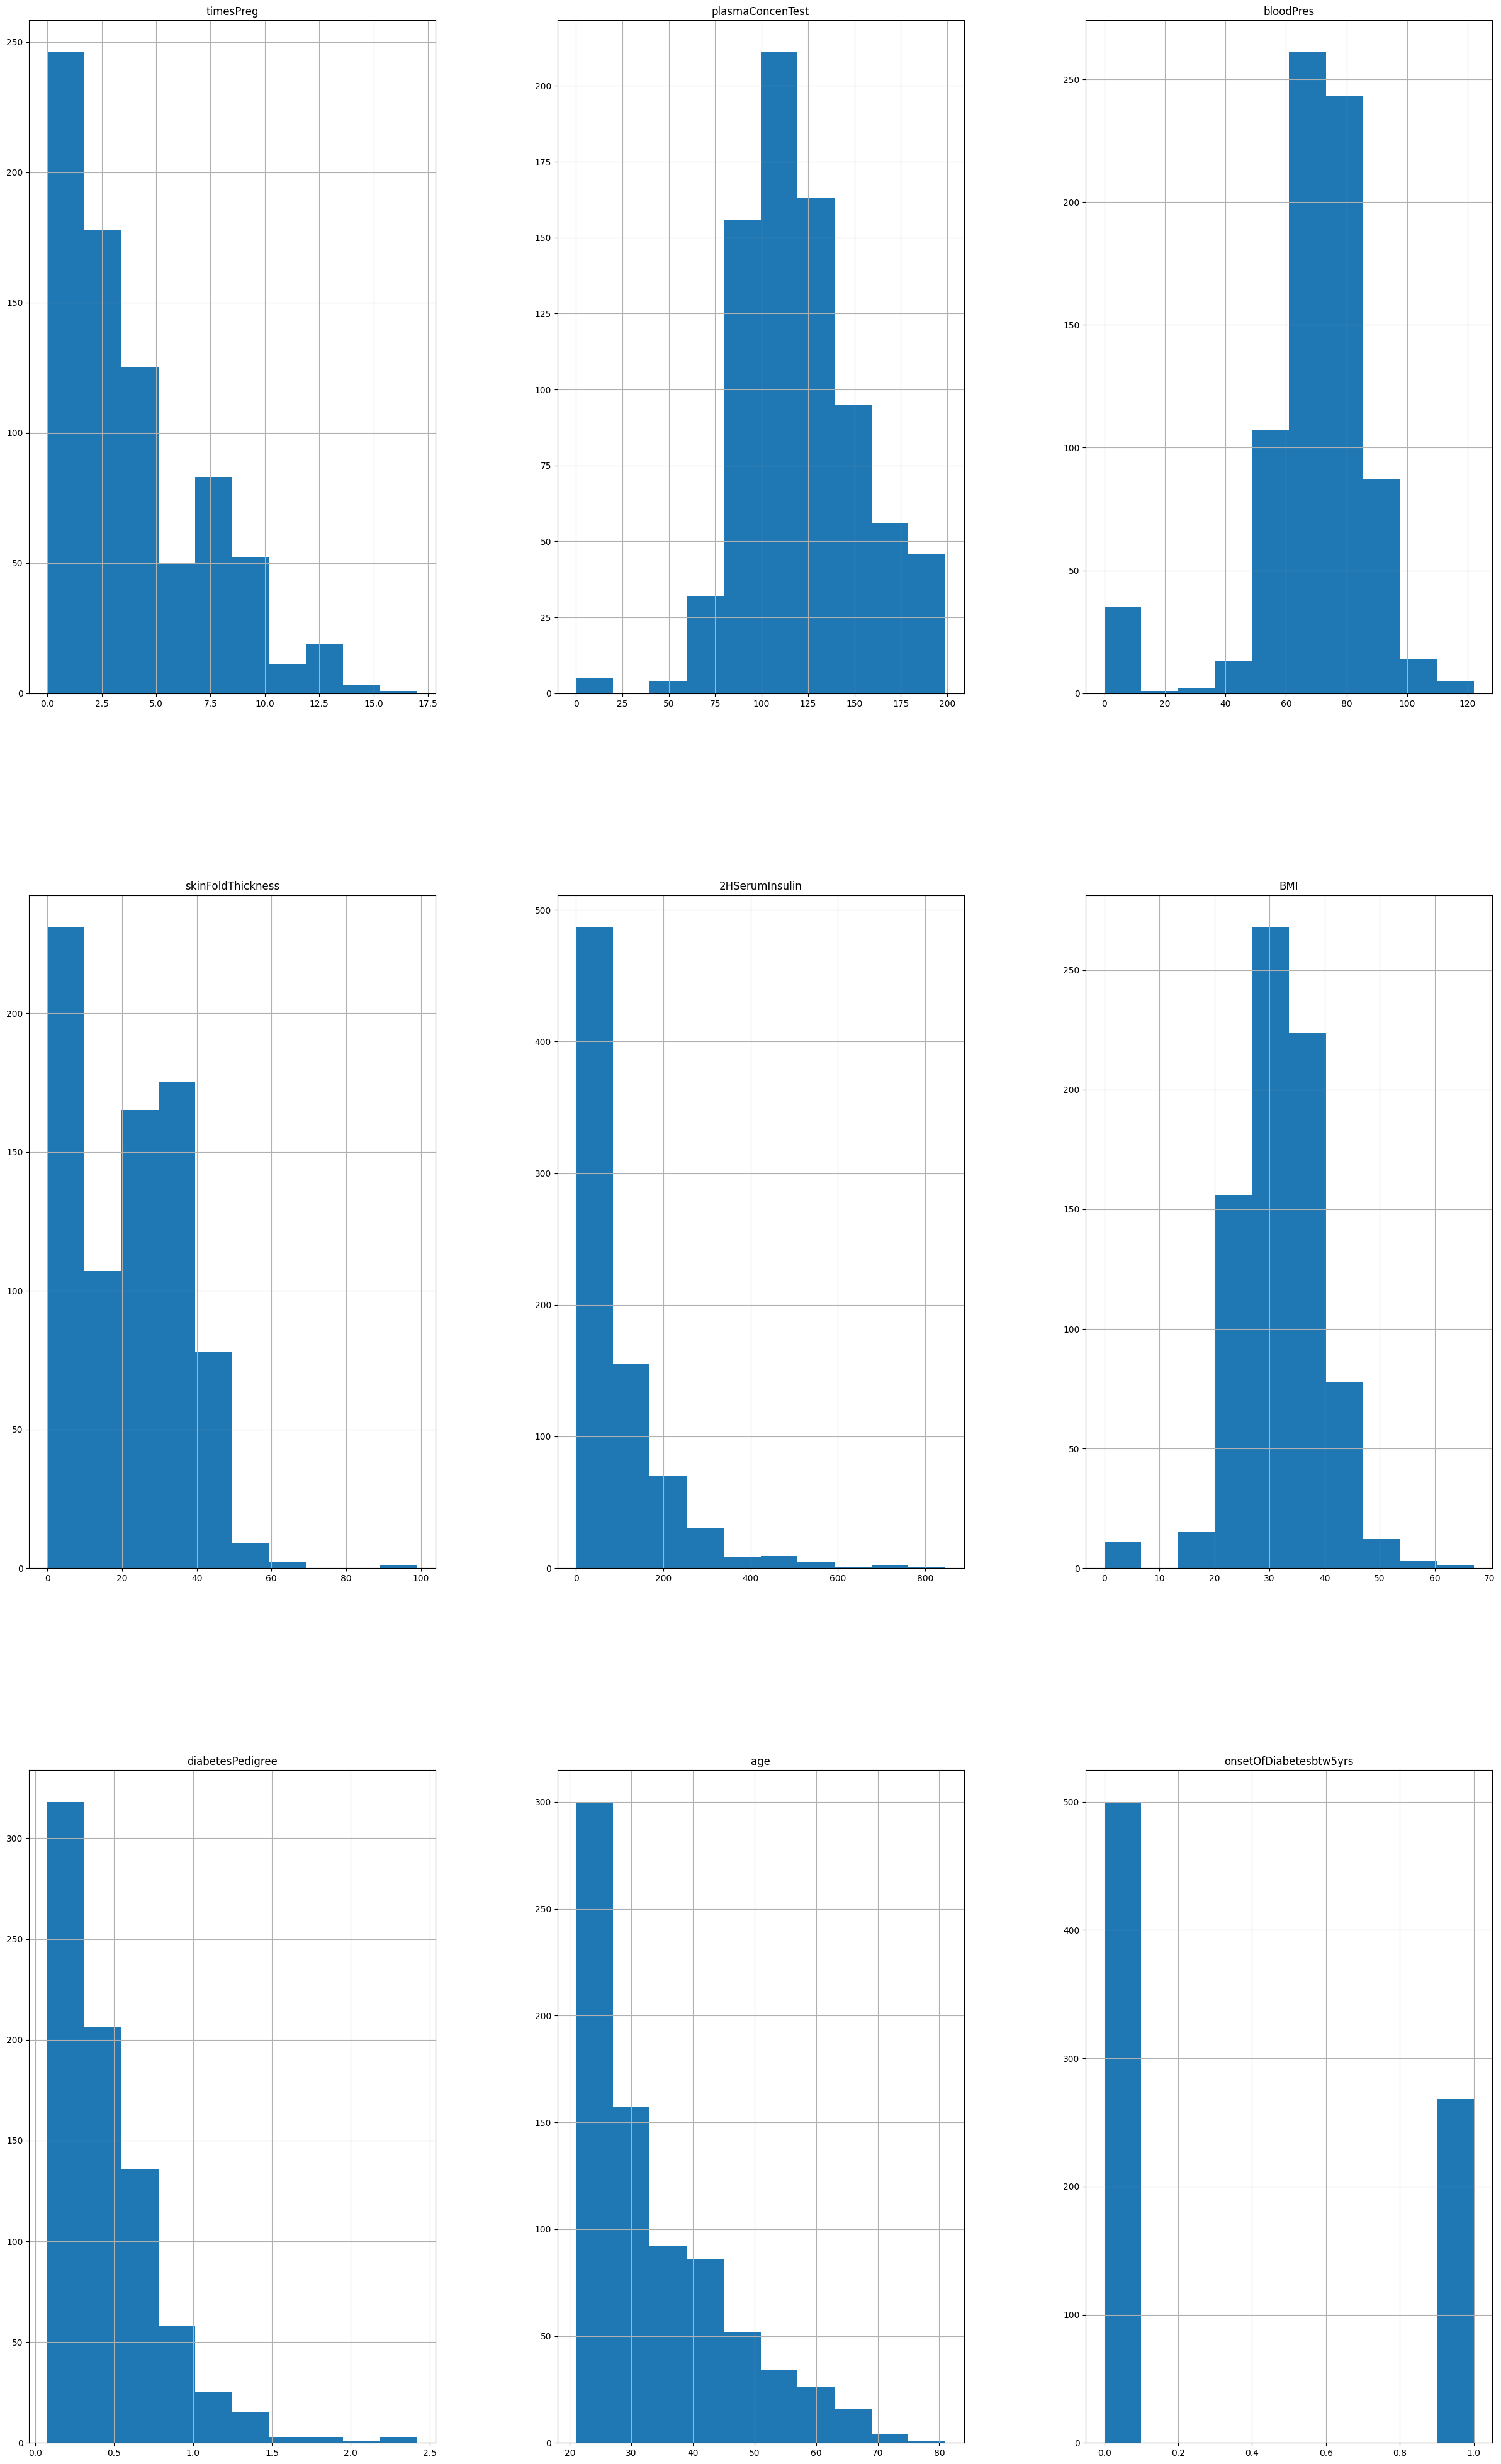

In [4]:
# import matplolib
from matplotlib import pyplot

# Histogram
df.hist(figsize=(30,50))
pyplot.show()

> The deafault number of bins in used by the pandas library is 10

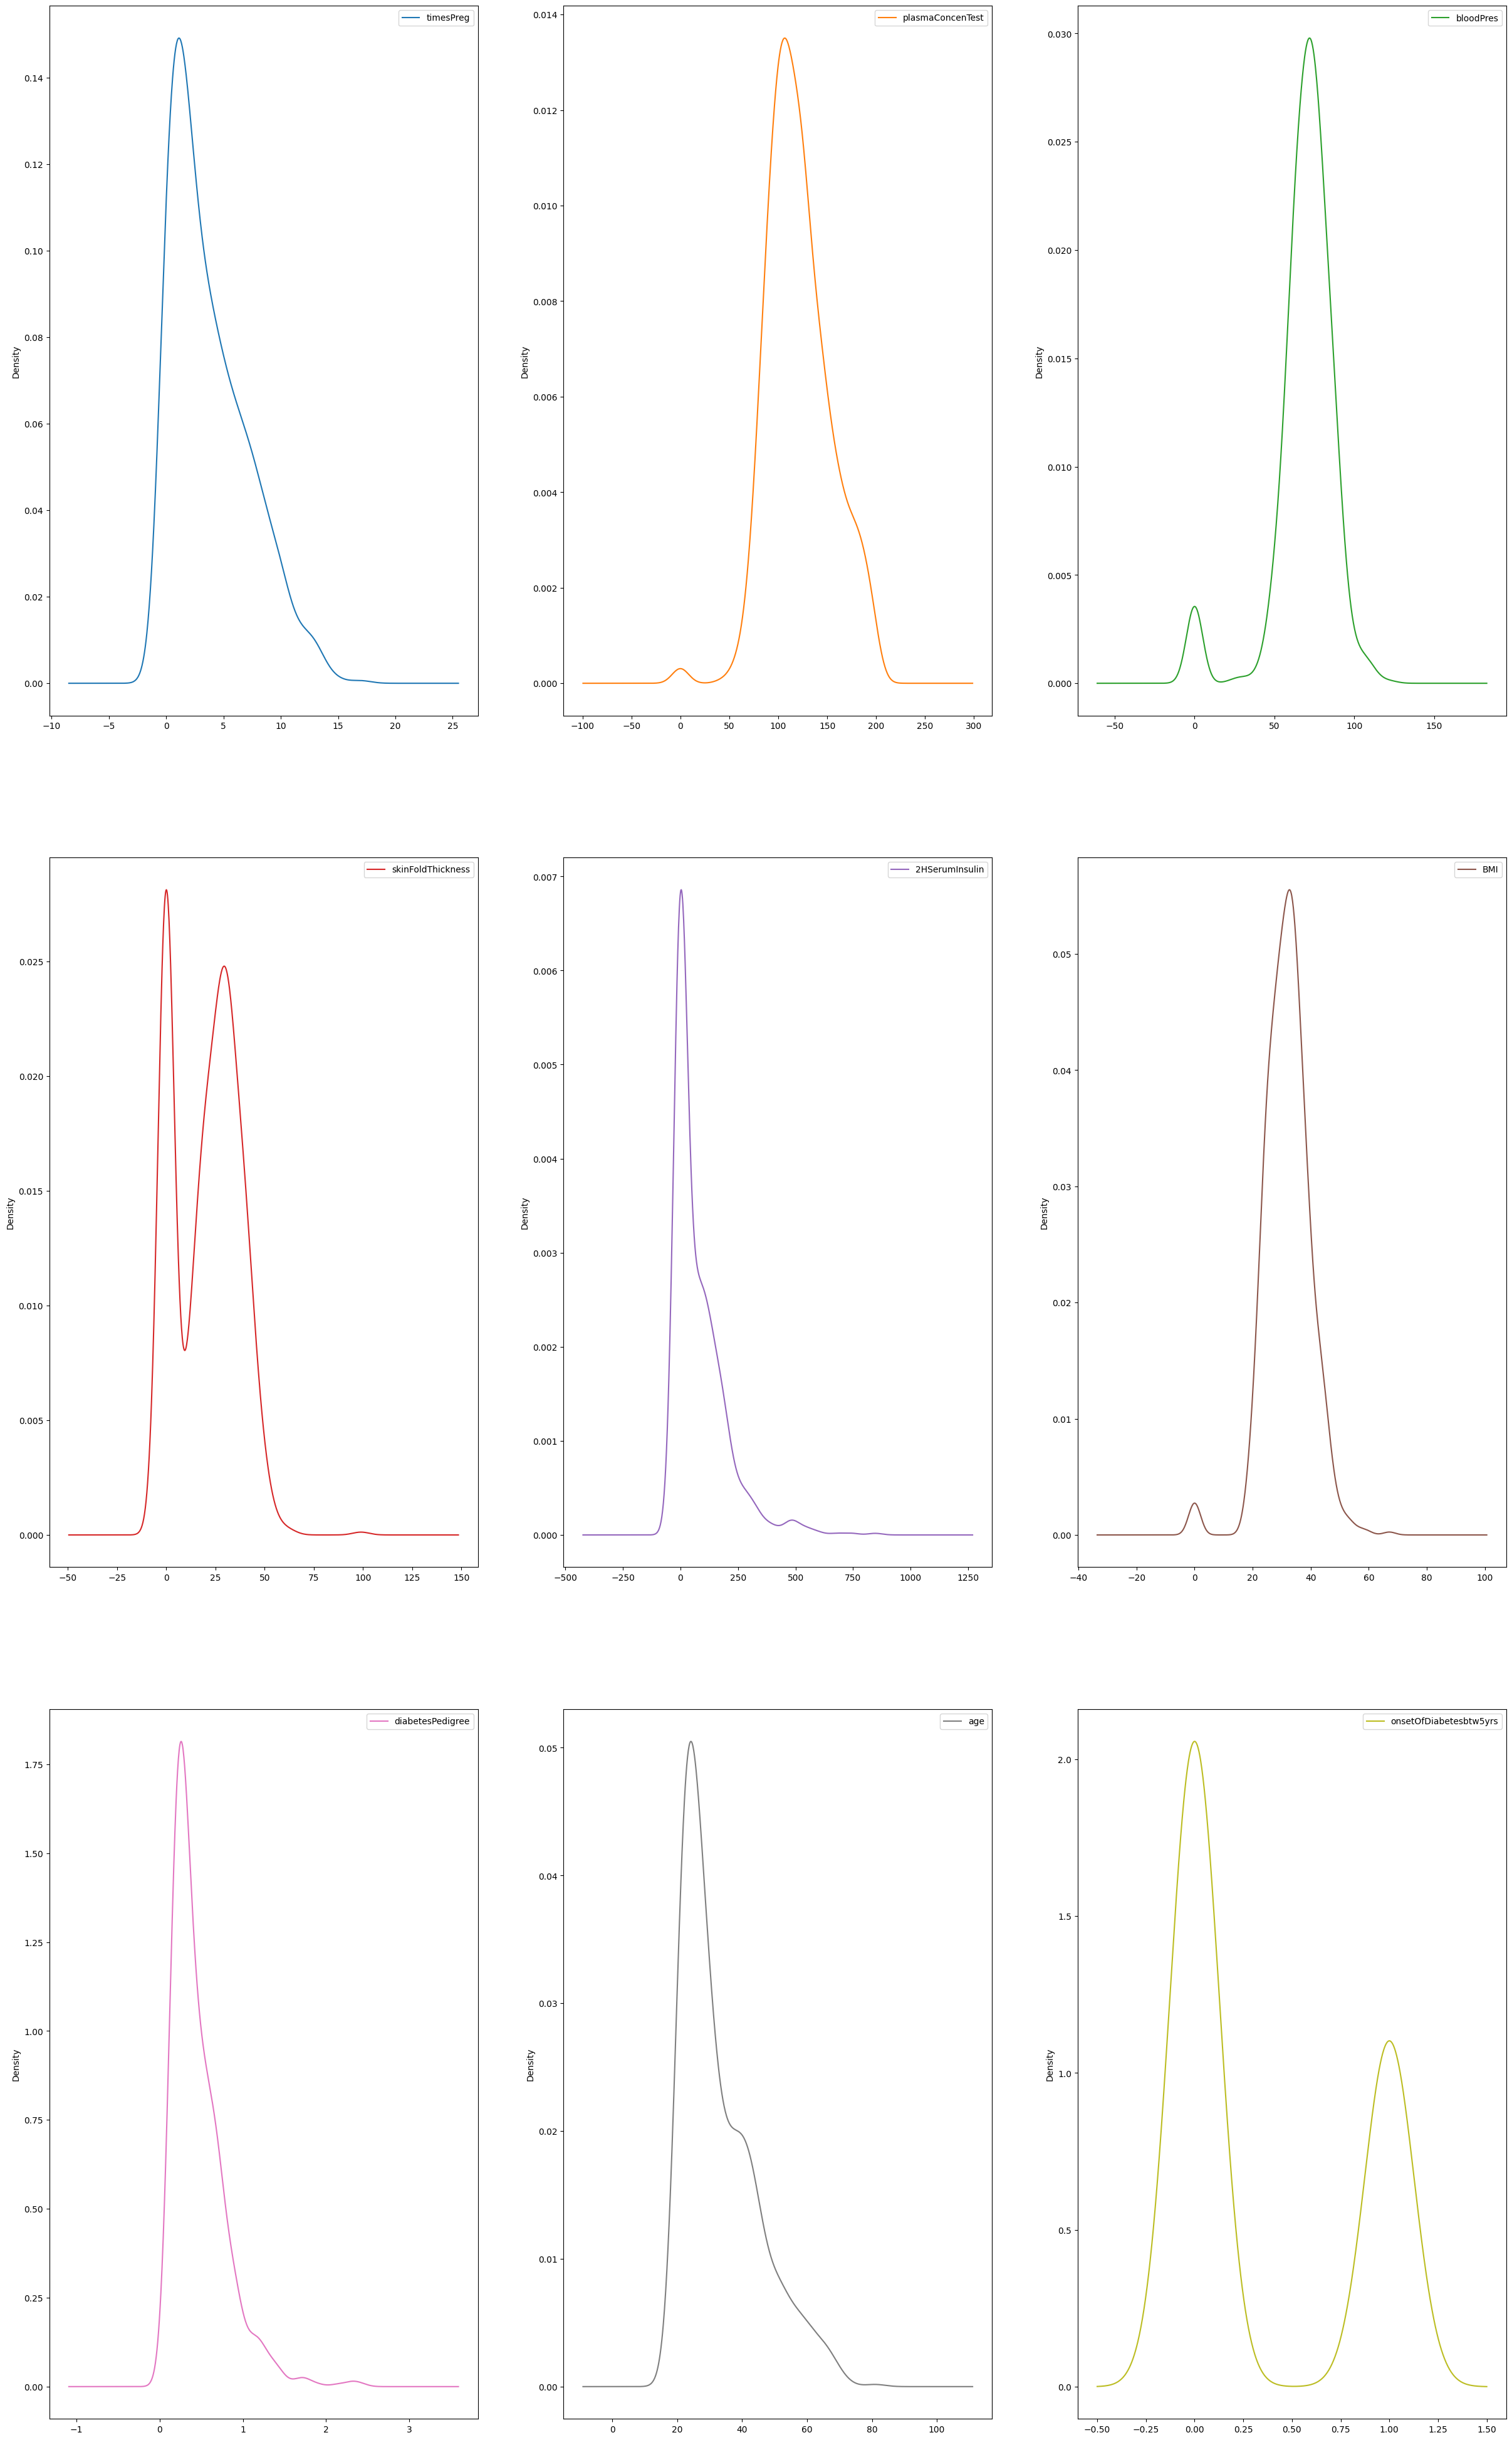

In [5]:
# Density plot
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(30,50))
pyplot.show()

The `Datafram.plot()` function provides the following as plots you can create with it.

> The kind of plot to produce: <br/>
‘line’ : line plot (default) <br/>
‘bar’ : vertical bar plot <br/>
‘barh’ : horizontal bar plot <br/>
‘hist’ : histogram <br/>
‘box’ : boxplot <br/>
‘kde’ : Kernel Density Estimation plot <br/>
‘density’ : same as ‘kde’ <br/>
‘area’ : area plot <br/>
‘pie’ : pie plot <br/>
‘scatter’ : scatter plot (DataFrame only) <br/>
‘hexbin’ : hexbin plot (DataFrame only)

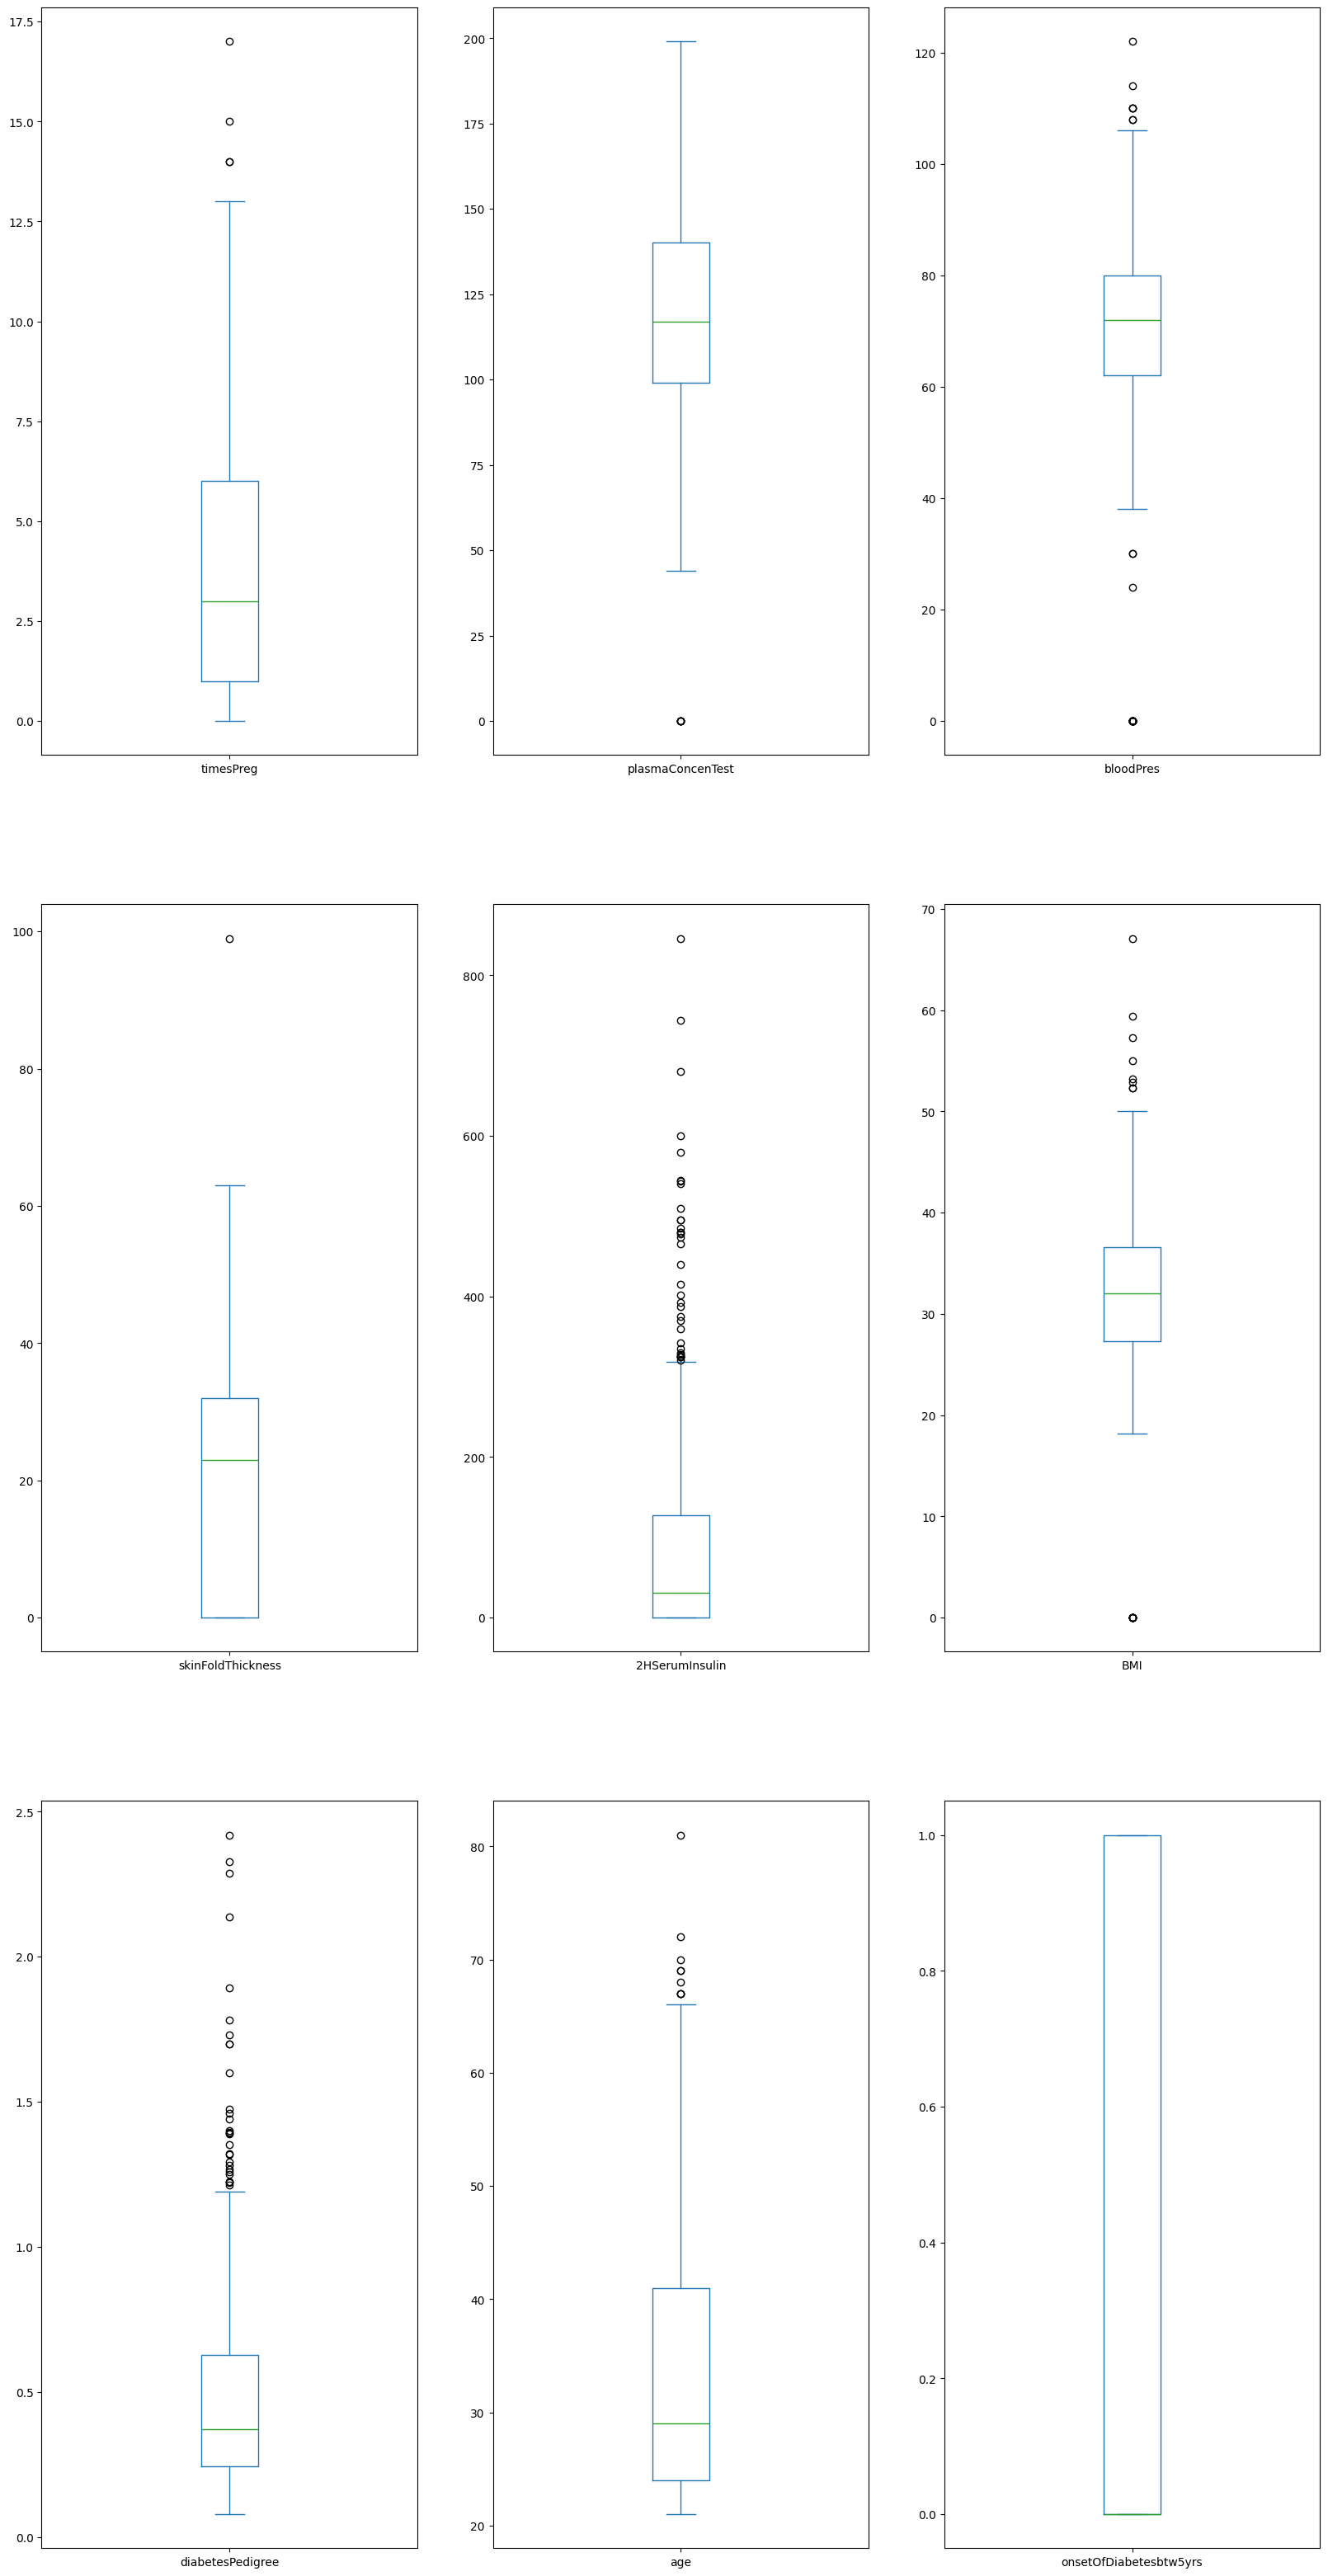

In [6]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(20,40)) 
pyplot.show()

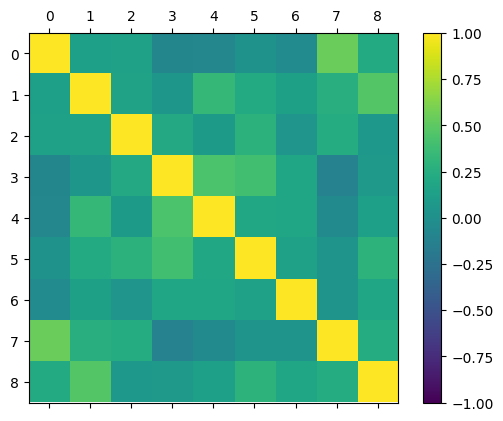

In [7]:
# Correlation matrix

import numpy as np
correlation = df.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# ax.set_xticklabels(names)
# ax.set_yticklabels(names)
pyplot.show()

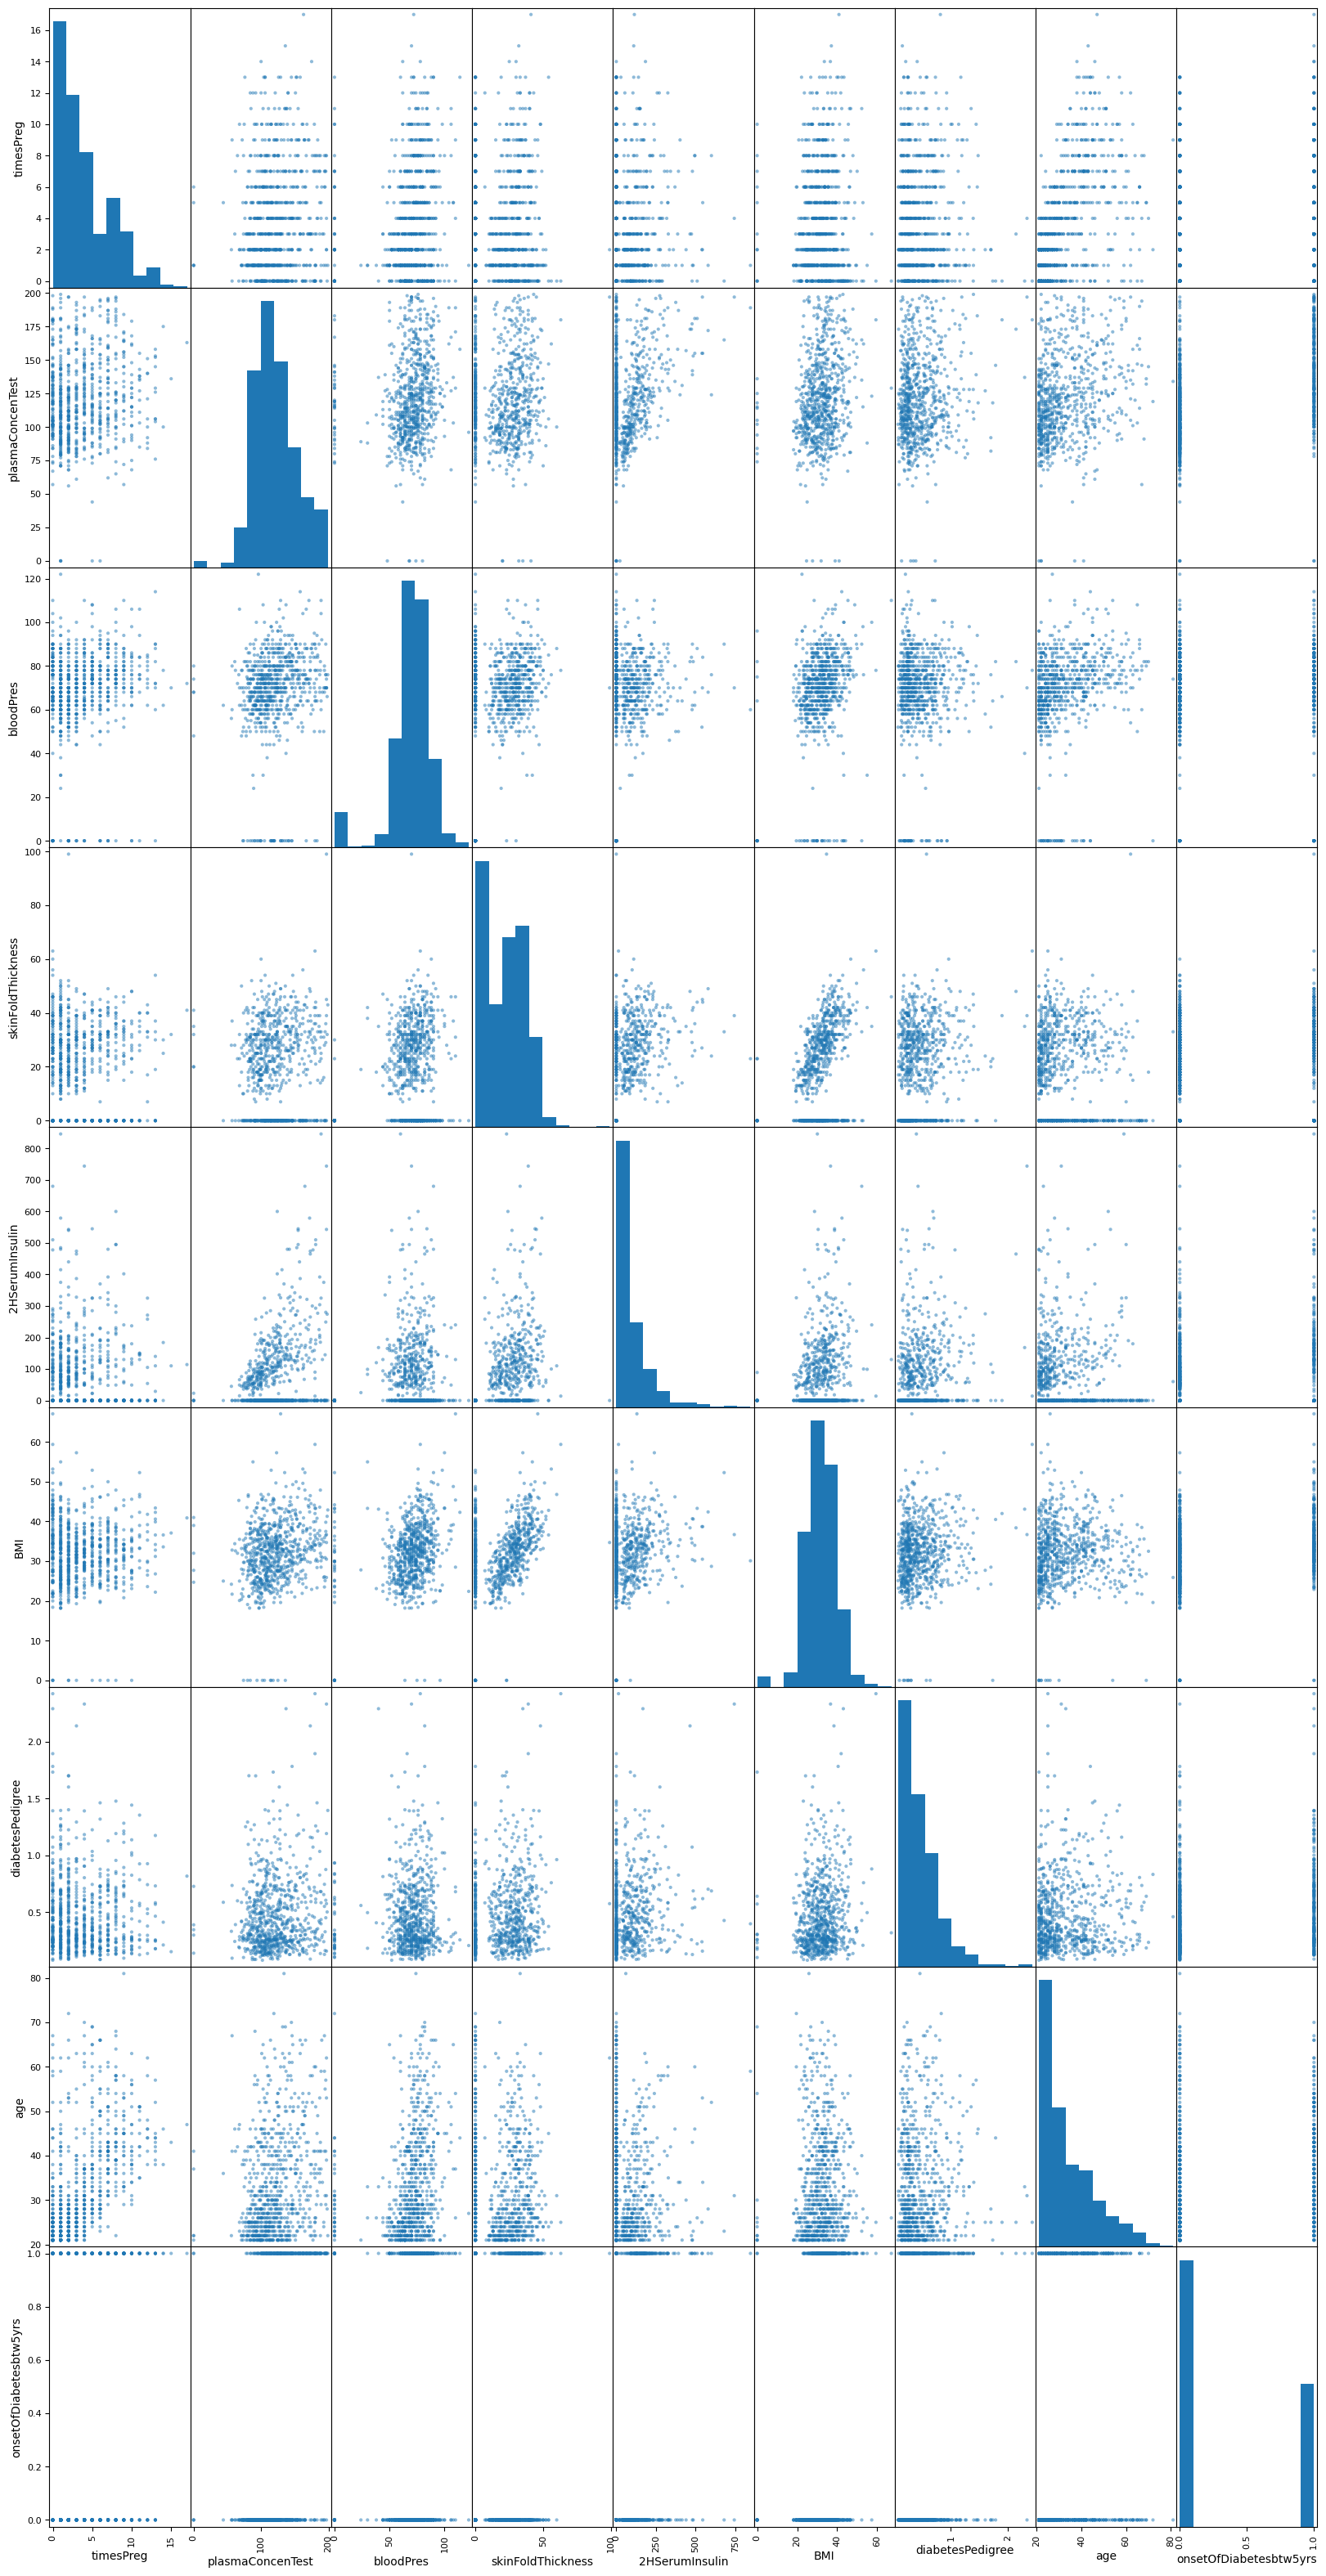

In [8]:
# Scatterplot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=[20, 40])
pyplot.show()

In [16]:
# Data rescaling

from sklearn.preprocessing import MinMaxScaler
array = df.values

X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [37]:
# Standardize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


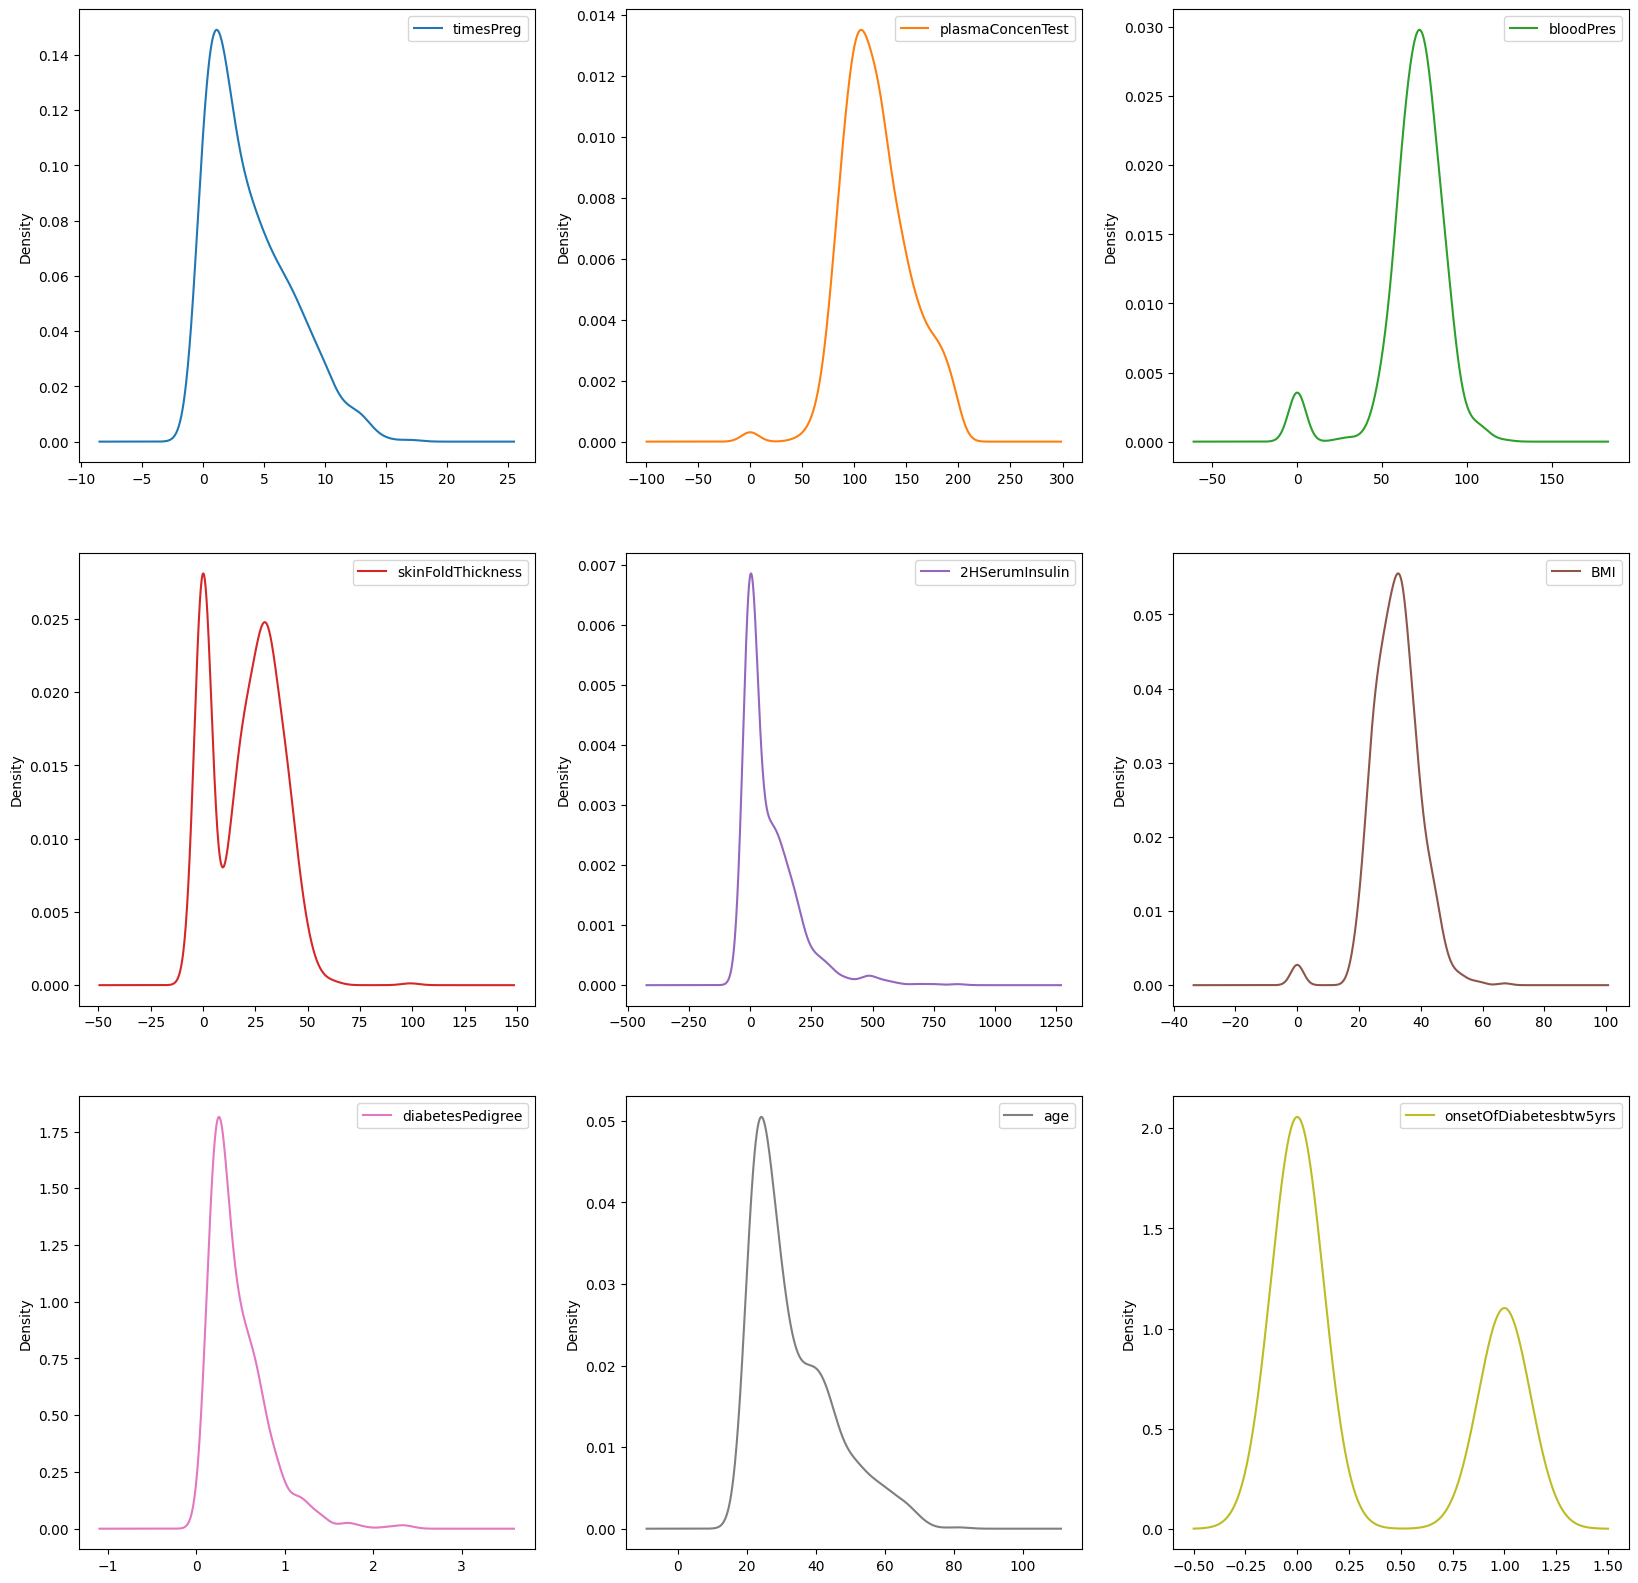

In [11]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=[20, 20])
pyplot.show()

<Axes: ylabel='Count'>

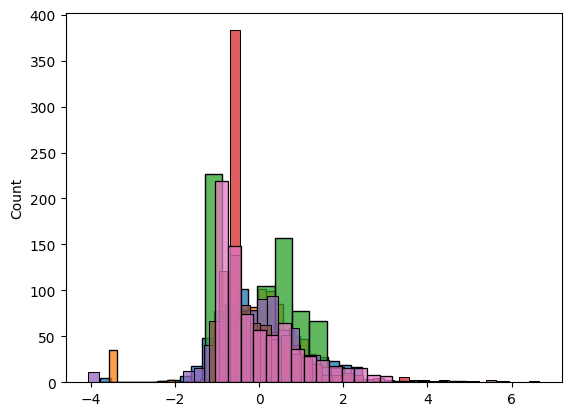

In [18]:
# Plotting rescaled columns

import seaborn as sns
sns.histplot(rescaledX[:, 1])
sns.histplot(rescaledX[:, 2])
sns.histplot(rescaledX[:, 3])
sns.histplot(rescaledX[:, 4])
sns.histplot(rescaledX[:, 5])
sns.histplot(rescaledX[:, 6])
sns.histplot(rescaledX[:, 7])

In [30]:
# Normalise data

from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [38]:
# Binarise Data

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [52]:
# Decision tree classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier 
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold) 
print("Mean estimated accuracy \n",results.mean())

# Decision tree classification on normalised data
results2 = cross_val_score(model, normalizedX, Y, cv=kfold) 
print("Mean estimated accuracy on normalised data \n",results2.mean())

Mean estimated accuracy 
 0.6954374572795625
Mean estimated accuracy on normalised data 
 0.649812030075188
